# Analysis of Electric Car Data

Author: Yongjun Zhu

Course Project, UC Irvine, Math 10, F23

## Introduction

Introduce your project here.  Maybe 3 sentences.

In the era of sustainable transportation, electric vehicles (EVs) have emerged as a pivotal force reshaping the automotive landscape. As we witness a surge in the adoption of electric cars, understanding the nuances of their performance and efficiency becomes crucial for both consumers and industry stakeholders. This project delves into an analysis of electric car data, focusing on whether a diference in power train affect the range, top speed, efficiency.

## Importing and Cleaning the data

You can either have all one section or divide into multiple sections.  To make new sections, use `##` in a markdown cell.  Double-click this cell for an example of using `##`

In [ ]:
import pandas as pd
import altair as alt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [ ]:
df = pd.read_csv("ElectricCarData_Clean.csv")
df

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Nissan,Ariya 63kWh,7.5,160,330,191,440,Yes,FWD,Type 2 CCS,Hatchback,C,5,45000
99,Audi,e-tron S Sportback 55 quattro,4.5,210,335,258,540,Yes,AWD,Type 2 CCS,SUV,E,5,96050
100,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,194,440,Yes,AWD,Type 2 CCS,Hatchback,C,5,50000
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,232,450,Yes,AWD,Type 2 CCS,Hatchback,C,5,65000


In [ ]:
df.isnull().values.any()

False

Since the output is false, this Dataset is clean. After make sure that the data is clean, we now need to basicly describe the relevant variables I would use. 

In [ ]:
# Calculate mean, median, standard deviation
mean_Efficiency_WhKm = df['Efficiency_WhKm'].mean()
median_Efficiency_WhKm = df['Efficiency_WhKm'].median()
std_Efficiency_WhKm = df['Efficiency_WhKm'].std()
print (mean_Efficiency_WhKm)
print (median_Efficiency_WhKm)
print (std_Efficiency_WhKm)

189.16504854368932
180.0
29.566839230892835


In [ ]:
mean_TopSpeed_KmH = df['TopSpeed_KmH'].mean()
median_TopSpeed_KmH = df['TopSpeed_KmH'].median()
std_TopSpeed_KmH = df['TopSpeed_KmH'].std()
print (mean_TopSpeed_KmH)
print (median_TopSpeed_KmH)
print (std_TopSpeed_KmH)

179.19417475728156
160.0
43.573030481499785


In [ ]:
mean_Range_Km = df['Range_Km'].mean()
median_Range_Km = df['Range_Km'].median()
std_Range_Km = df['Range_Km'].std()
print (mean_Range_Km)
print (median_Efficiency_WhKm)
print (std_Efficiency_WhKm)

338.7864077669903
180.0
29.566839230892835


For efficiency, the mean and median are close, indicating a symmetric distribution. The relatively low standard deviation suggests consistency in acceleration values.
For top speed, the mean is higher than the median, suggesting a right-skewed distribution with a few vehicles having very high top speeds.
For range, the mean is significantly higher than the median, indicating a right-skewed distribution with a few vehicles having much longer ranges.

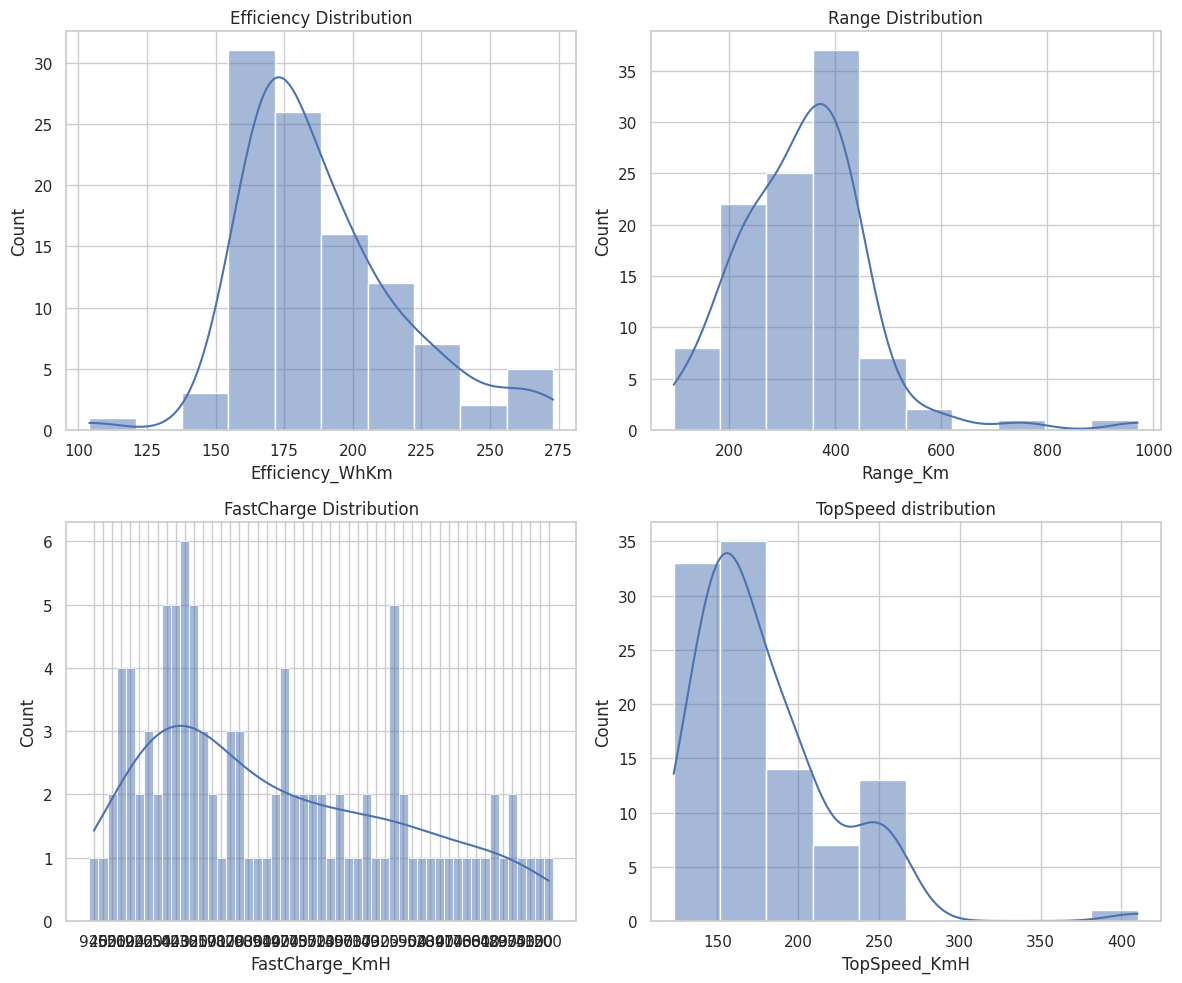

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
sns.histplot(df['Efficiency_WhKm'], bins=10, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Efficiency Distribution')
sns.histplot(df['Range_Km'], bins=10, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Range Distribution')
sns.histplot(df['FastCharge_KmH'], bins=10, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('FastCharge Distribution')
sns.histplot(df['TopSpeed_KmH'], bins=10, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('TopSpeed distribution')
plt.tight_layout()
plt.show()


## Predicting Factor Whether Diffference in Power Train is Important. 
I want to explore whether a diference in power train affect the range, top speed, or efficiency. For example, does AWD has a higher top speed than RWD or does RWD has a higher efficiency? 

## Decision Tree Regression 

In [ ]:
df

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Nissan,Ariya 63kWh,7.5,160,330,191,440,Yes,FWD,Type 2 CCS,Hatchback,C,5,45000
99,Audi,e-tron S Sportback 55 quattro,4.5,210,335,258,540,Yes,AWD,Type 2 CCS,SUV,E,5,96050
100,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,194,440,Yes,AWD,Type 2 CCS,Hatchback,C,5,50000
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,232,450,Yes,AWD,Type 2 CCS,Hatchback,C,5,65000


In [ ]:
cols = ["TopSpeed_KmH", "Range_Km",'Efficiency_WhKm']
clf = DecisionTreeClassifier(max_leaf_nodes=3, random_state=2)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[cols], df["PowerTrain"], test_size=0.1, random_state=1)

In [ ]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=3, random_state=2)

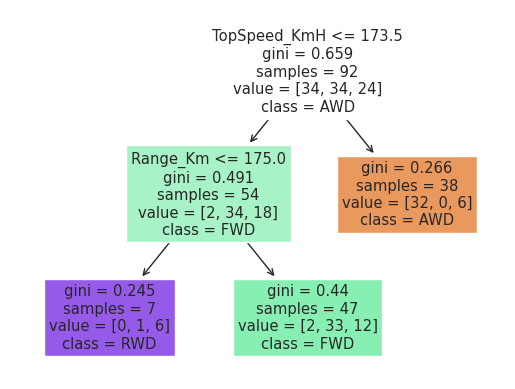

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fig = plt.figure()
_ = plot_tree(clf, 
                   feature_names=clf.feature_names_in_,
                   class_names=clf.classes_,
                   filled=True)

In [ ]:
clf.score(X_test, y_test)

0.9090909090909091

In [ ]:
clf.classes_

array(['AWD', 'FWD', 'RWD'], dtype=object)

In [ ]:
rng = np.random.default_rng()
arr = rng.random(size = (5000,3))
df2 = pd.DataFrame(arr, columns=cols)
df2.head(100)
df2["TopSpeed_KmH"] *= 533
df2["Range_Km"] *= 2000
df2['Efficiency_WhKm']*= 1500
df2['pred'] = clf.predict(df2[cols])
df2

,TopSpeed_KmH,Range_Km,Efficiency_WhKm,pred
0,75.763884,255.966114,900.393787,FWD
1,216.167973,987.532089,507.045214,AWD
2,230.895722,911.609365,734.088010,AWD
3,168.836826,410.808157,122.222156,FWD
4,118.586470,280.029296,1214.505492,FWD
...,...,...,...,...
4995,400.444607,1747.976327,1220.161437,AWD
4996,365.754845,1779.344836,742.714966,AWD
4997,362.125188,593.176167,5.623374,AWD
4998,222.911450,1436.147150,395.546491,AWD


In [ ]:
alt.Chart(df2).mark_circle().encode(
    x = "TopSpeed_KmH",
    y = "Efficiency_WhKm",
    color = 'pred'
)

alt.Chart(...)

Thus, from the above graph, we can easily see that the power train is irrelevant to efficiency of those EVs. However, the topspeed does. Even if the top speeds of FWD and RWD are almost the same, both smaller than 173.5km/h, cars with AWD can drive much faster than RWD and FWD. 

In [ ]:
alt.Chart(df2).mark_circle().encode(
    x = "TopSpeed_KmH",
    y = "Range_Km",
    color = 'pred'
)

alt.Chart(...)

From the above graph, we can see that compare to RWD, FWD EVs has more range. While, still, AWD get the highest topspeed. It seems that power train related to the range and the topspeed, instead of the efficiency. 

In [ ]:
alt.Chart(df2).mark_circle().encode(
    x = "Efficiency_WhKm",
    y = "Range_Km",
    color = 'pred'
)

alt.Chart(...)

This graph proves our thoughts above that the data of eficiency are all random, and only RWD and FWD affect the range. 

## Some Concerns about the Relation
We do show that the power training does affected EVs' topspeed and range. However, price is also a primary effect. In our common sense, FWD and RWD vehicles are more affordable, while AWD EVs are more expensive. Let's us check whether price is also affected. 

In [ ]:
df

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Nissan,Ariya 63kWh,7.5,160,330,191,440,Yes,FWD,Type 2 CCS,Hatchback,C,5,45000
99,Audi,e-tron S Sportback 55 quattro,4.5,210,335,258,540,Yes,AWD,Type 2 CCS,SUV,E,5,96050
100,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,194,440,Yes,AWD,Type 2 CCS,Hatchback,C,5,50000
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,232,450,Yes,AWD,Type 2 CCS,Hatchback,C,5,65000


In [ ]:
cols2 = ["TopSpeed_KmH", "Range_Km",'PriceEuro']
clf = DecisionTreeClassifier(max_leaf_nodes=3, random_state=2)
from sklearn.model_selection import train_test_split
X_train_copy, X_test_copy, y_train_copy, y_test_copy = train_test_split(df[cols2], df["PowerTrain"], test_size=0.1, random_state=1)

In [ ]:
clf.fit(X_train_copy, y_train_copy)

DecisionTreeClassifier(max_leaf_nodes=3, random_state=2)

In [ ]:
clf.score(X_test_copy, y_test_copy)

0.7272727272727273

In [ ]:
rng = np.random.default_rng()
arr = rng.random(size = (5000,3))
df3 = pd.DataFrame(arr, columns=cols2)
df3.head(100)
df3["TopSpeed_KmH"] *= 533
df3["Range_Km"] *= 2000
df3['PriceEuro']*= 150000
df3['pred'] = clf.predict(df3[cols2])
df3

,TopSpeed_KmH,Range_Km,PriceEuro,pred
0,477.074797,236.322462,105212.397918,AWD
1,264.183237,148.540958,17435.334464,RWD
2,501.443481,1650.618871,120598.841358,AWD
3,85.999767,1937.402358,28153.593600,FWD
4,235.734838,645.247924,120656.262036,AWD
...,...,...,...,...
4995,296.087939,1224.857933,51461.448756,AWD
4996,59.041436,664.649628,51193.516643,AWD
4997,52.304701,567.583976,141330.737613,AWD
4998,70.680920,1163.603349,70373.781378,AWD


In [ ]:
alt.Chart(df3).mark_circle().encode(
    x = "TopSpeed_KmH",
    y = "PriceEuro",
    color = 'pred'
)

alt.Chart(...)

Thus, we found that AWD EVs have higher price than FWD and RWD. Due to this high price, it is reasonable for AWD to have a higher topspeed but not range. 

## Summary
Normally, all else being equal, AWD vehicles tend to have slightly lower ranges compared to their RWD or FWD counterparts. This is because AWD systems generally involve more components and increased weight, which can affect energy efficiency. However, since in reality, AWD EVs always have a hgher price, this "slightly low" might not reflect from the analysis. 
The choice of powertrain can influence the top speed capabilities of an electric vehicle. AWD vehicles might have higher top speeds, especially in performance-oriented models, due to improved traction and stability.
Generally, FWD electric vehicles tend to be more energy-efficient compared to AWD models. This is because AWD systems introduce additional mechanical components and increase the overall weight of the vehicle.

## References

Your code above should include references.  Here is some additional space for references.

* What is the source of your dataset(s)?

1. Datasource: ev-database.org/
2. Banner image: freepik - author - 'macrovector'

* List any other references that you found helpful.

[AWD, FWD, or RWD—Which Wheel Drive Is Best?](https://www.motortrend.com/features/awd-vs-fwd-vs-rwd-which-wheel-drive-is-best/)

[Front-Wheel Drive vs. Rear-Wheel Drive | Pros & Cons ()](https://www.autosimple.com/blog/front-wheel-drive-vs-rear-wheel-drive-pros-cons/)